In [1]:
import os 
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
orb = cv2.ORB_create()
# sift = cv2.SIFT_create()

In [3]:
path_train = "data/train/"
path_test = "data/test/"

In [4]:
data = []
gestures = []
gestures_test = []
best_matches = 0 
for folder in os.listdir(path_train):
    descriptor_list = []
    for img_path in os.listdir(path_train + folder):
        currpath = path_train + folder + '/' + img_path
        # print(currpath)
        img = cv2.imread(currpath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        processed_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        processed_img = cv2.medianBlur(processed_img, 3)
        processed_img = cv2.equalizeHist(processed_img)
        img_keypoint, img_descriptor = orb.detectAndCompute(processed_img, None)
        # img_descriptor = np.float32(img_descriptor)
        descriptor_list.append(img_descriptor)
    gestures.append((folder, np.vstack(descriptor_list)))

for folder in os.listdir(path_test):
    descriptor_list = []
    for img_path in os.listdir(path_test + folder):
        currpath = path_test + folder + '/' + img_path
        # print(currpath)
        img = cv2.imread(currpath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        processed_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        processed_img = cv2.medianBlur(processed_img, 3)
        processed_img = cv2.equalizeHist(processed_img)
        img_keypoint, img_descriptor = orb.detectAndCompute(processed_img, None)
        # img_descriptor = np.float32(img_descriptor)
        descriptor_list.append(img_descriptor)
    gestures_test.append((folder, np.vstack(descriptor_list)))
    
     

In [16]:
# print(gestures_test)
print(gestures)

[('0', array([[245, 175,  77, ..., 250, 114,  40],
       [173, 176, 169, ...,   8, 208, 242],
       [156,  52, 191, ...,  96, 165, 243],
       ...,
       [ 25,  73,  66, ..., 182, 104,  12],
       [ 85,  79, 110, ..., 179,  98,  32],
       [ 25,  79,  94, ..., 179,  41,  40]], dtype=uint8)), ('1', array([[114,  73,  18, ...,  63, 110,  14],
       [ 66, 233, 148, ...,  22, 139,  14],
       [236,  48, 189, ..., 225,  70, 114],
       ...,
       [ 73,  61, 155, ..., 128,  33,  41],
       [138, 189,  42, ...,   4, 191, 223],
       [129, 152,  61, ..., 136, 129, 251]], dtype=uint8)), ('10', array([[  2, 133,  26, ...,  10, 181, 138],
       [  2, 141,  19, ...,  10, 181, 138],
       [ 34, 205,  18, ...,  14, 177, 142],
       ...,
       [125, 113,  59, ..., 187,  66,  35],
       [ 92, 121, 123, ...,  51,  39,  51],
       [ 92, 121, 123, ..., 179,  39,  51]], dtype=uint8)), ('11', array([[ 70, 233, 148, ...,  21, 139,  14],
       [236,  48, 189, ..., 225,  70, 115],
       [ 

In [ ]:

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Prepare data for the classifier
x_train = []
y_train = []

x_test = []
y_test = []


for gesture_id, descriptors in gestures:
    for descriptor in descriptors:
        x_train.append(descriptor)
        y_train.append(int(gesture_id))

for gesture_id, descriptors in gestures_test:
    for descriptor in descriptors:
        x_test.append(descriptor)
        y_test.append(int(gesture_id))

x_train = np.array(x_train, dtype=np.float32) 
y_train = np.array(y_train)

x_test = np.array(x_test, dtype=np.float32) 
y_test = np.array(y_test)

knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(x_train, y_train)

y_predict = model.predict(x_test)

score = accuracy_score(y_predict, y_test)
print(score)


In [28]:

# from sklearn.cluster import KMeans
# from sklearn.neighbors import KNeighborsClassifier

# # Prepare data for the classifier
# X = []
# y = []

# for gesture_id, descriptors in gestures:
#     for descriptor in descriptors:
#         X.append(descriptor)
#         y.append(int(gesture_id))

# # kmeans = KMeans(n_clusters=100)  
# # all_descriptors = np.vstack(X)
# # kmeans.fit(all_descriptors)

# # def create_bovw_feature(image_descriptors):
# #     words = kmeans.predict(image_descriptors)
# #     bovw_histogram, _ = np.histogram(words, bins=range(100))
# #     return bovw_histogram

# # for desc in all_descriptors:
# #     bowv_feature = create_bovw_feature(desc)
# #     X.append(bowv_feature)

# X = np.array(X, dtype=np.float32) 
# y = np.array(y)

# # Train a KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X, y)


./data/test/0/20.jpg


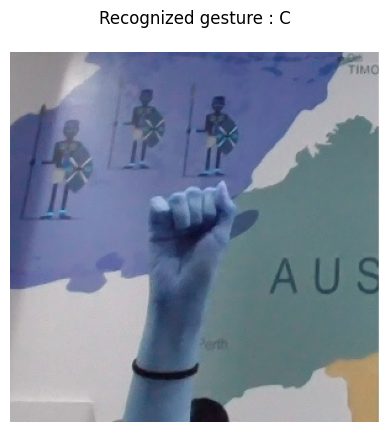

./data/test/1/20.jpg


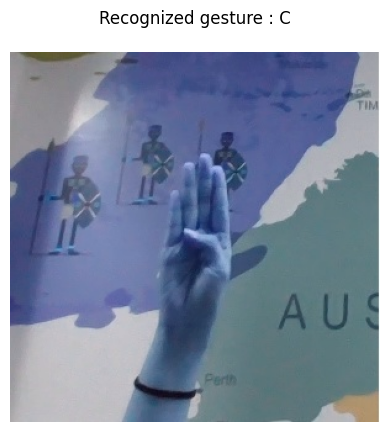

./data/test/10/20.jpg


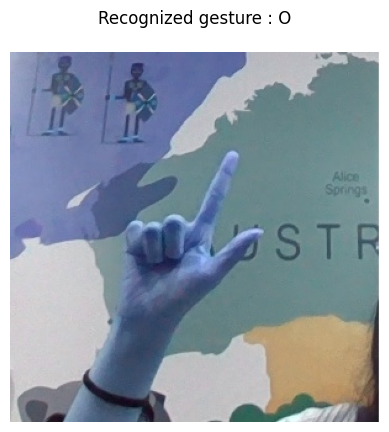

./data/test/11/20.jpg


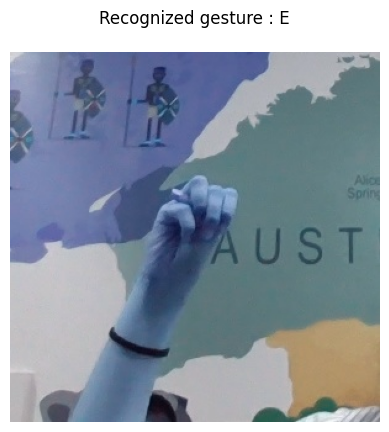

./data/test/12/20.jpg


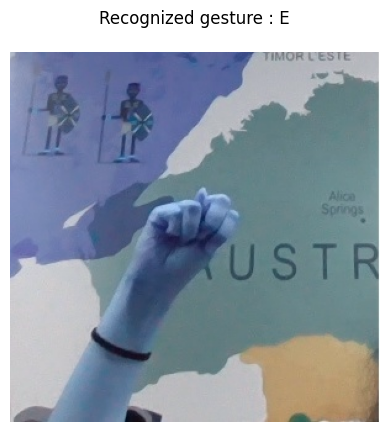

./data/test/13/20.jpg


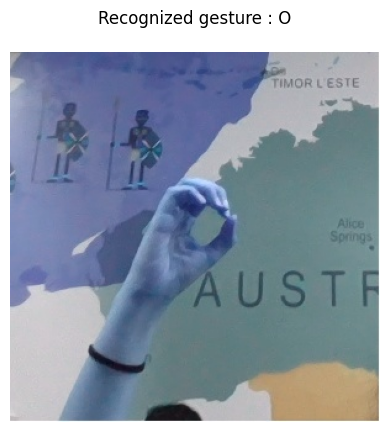

./data/test/14/20.jpg


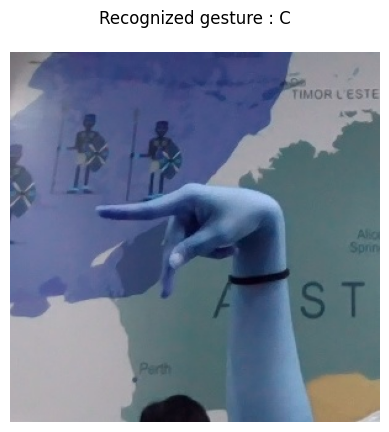

./data/test/15/20.jpg


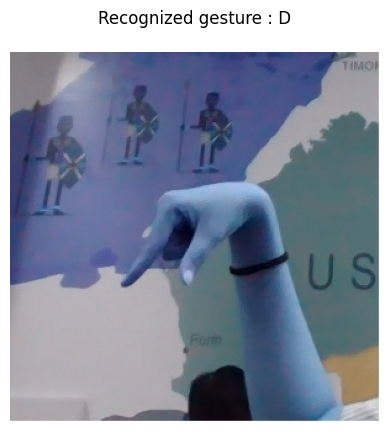

./data/test/16/20.jpg


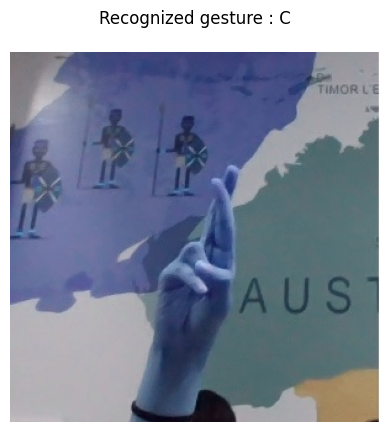

./data/test/17/20.jpg


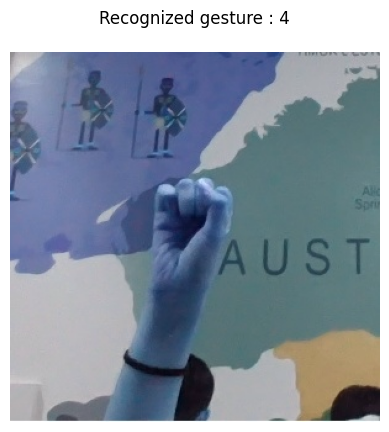

./data/test/18/20.jpg


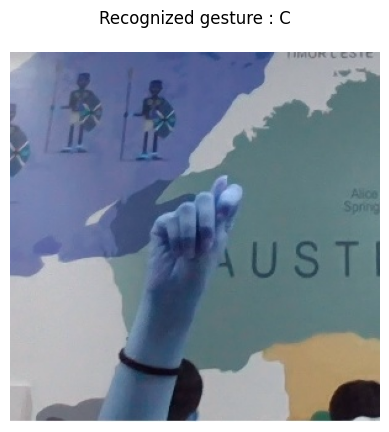

./data/test/19/20.jpg


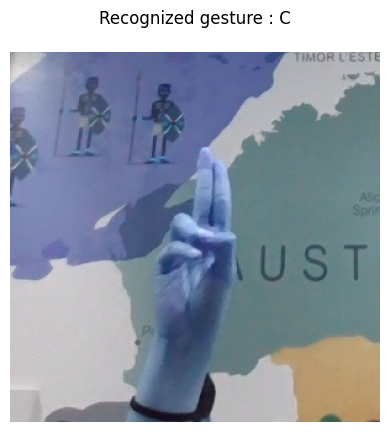

./data/test/2/20.jpg


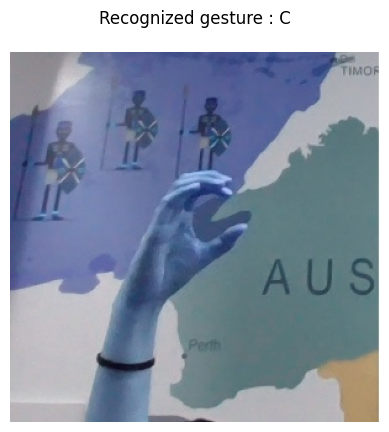

./data/test/20/20.jpg


KeyboardInterrupt: 

In [26]:
def recognize_gesture(img_path):
    # keypoints, descriptors = orb.detectAndCompute(img, None)
    target = cv2.imread(img_path)
    target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
    process_target = cv2.cvtColor(target, cv2.COLOR_RGB2GRAY)
    process_target = cv2.medianBlur(process_target, 3)
    process_target = cv2.equalizeHist(process_target)
    keypoints, descriptors = orb.detectAndCompute(process_target, None)
    # descriptors = np.float32(descriptors)

    if descriptors is not None:
        predictions = knn.predict(descriptors)
        gesture = np.bincount(predictions).argmax()  # Get the most common gesture prediction
        return gesture
    else:
        return "No keypoints found"

target_path = "./data/test/"
# recognized_gesture = recognize_gesture(target)
# print(f"Recognized gesture: {recognized_gesture}")
gesture_mapping = {0: 'A', 1: 'B', 2: 'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'K', 10:'L', 11:'M', 12:'N', 13:'O', 14:'P', 15:'Q', 16:'R', 17:'S', 18:'T', 19:'U', 20:'V', 21:'W', 22:"X", 23:'Y', 24:'1', 25:'2', 26:'3', 27:'4', 28:'5', 29:'6', 30:'7', 31:'8', 32: '9'}

i = 1
for ti_path in os.listdir(target_path):
    
    this_path = str(target_path + ti_path + '/20.jpg')
    print(this_path)
    recognized_gesture = recognize_gesture(this_path)
    target_img = cv2.imread(this_path)
    plt.imshow(target_img)
    plt.title(f"Recognized gesture : {gesture_mapping[recognized_gesture]}\n")
    plt.axis('off')
    # plt.figure(figsize=(3,4))
    plt.savefig(str(i) + '.png')
    plt.show()
    i += 1
    


# target_img = cv2.imread(target)
# plt.imshow(target_img)
# plt.title(f"Recognized gesture : {gesture_mapping[recognized_gesture]}")
# plt.axis('off')
# plt.show()


In [51]:
# def show_image_with_label(image_path, label):
#     img = cv2.imread(image_path, 0)  # Load image in grayscale
#     plt.imshow(img, cmap='gray')
#     plt.title(f"Label: {label}")
#     plt.axis('off')
#     plt.show()

# # Example: Show 5 images from each gesture class
# for gesture_folder in os.listdir(path):
#     folder_path = path + gesture_folder
#     print(f"Showing images for Gesture Class {gesture_folder}:")

#     for i, img_file in enumerate(os.listdir(folder_path)):
#         if i >= 5:  # Show only 5 images per gesture class
#             break
#         img_path = os.path.join(folder_path, img_file)
#         show_image_with_label(img_path, gesture_folder)


In [49]:
# target = cv2.imread("./tes/1/300.jpg")
# target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
# process_target = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
# process_target = cv2.medianBlur(process_target, 3)
# process_target = cv2.equalizeHist(process_target)

# target_keypoint, target_descriptor = sift.detectAndCompute(process_target, None)
# target_descriptor = np.float32(target_descriptor)

In [52]:
# for gesture_folder in os.listdir(path):
#     folder_path = path + gesture_folder
#     num_images = len(os.listdir(folder_path))
#     print(f"Gesture {gesture_folder}: {num_images} images")